[2.137178236977158, 4.222734502312137, 4.5316234255645655, 5.988220242586569, 4.1651532746559035, 4.5824072639245985, 5.368801899776326, 4.818496416060765, 4.643355726038585, 4.879105581498073, 5.1395853846839215, 4.953890443954207, 5.429702764962716, 4.898430458278901, 4.950866542259298, 4.333170115971902, 5.735920755505812, 4.892995994188948, 5.591795105054587, 4.972066845731741, 4.24592113061865, 4.880374743693849, 5.405605653948579]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


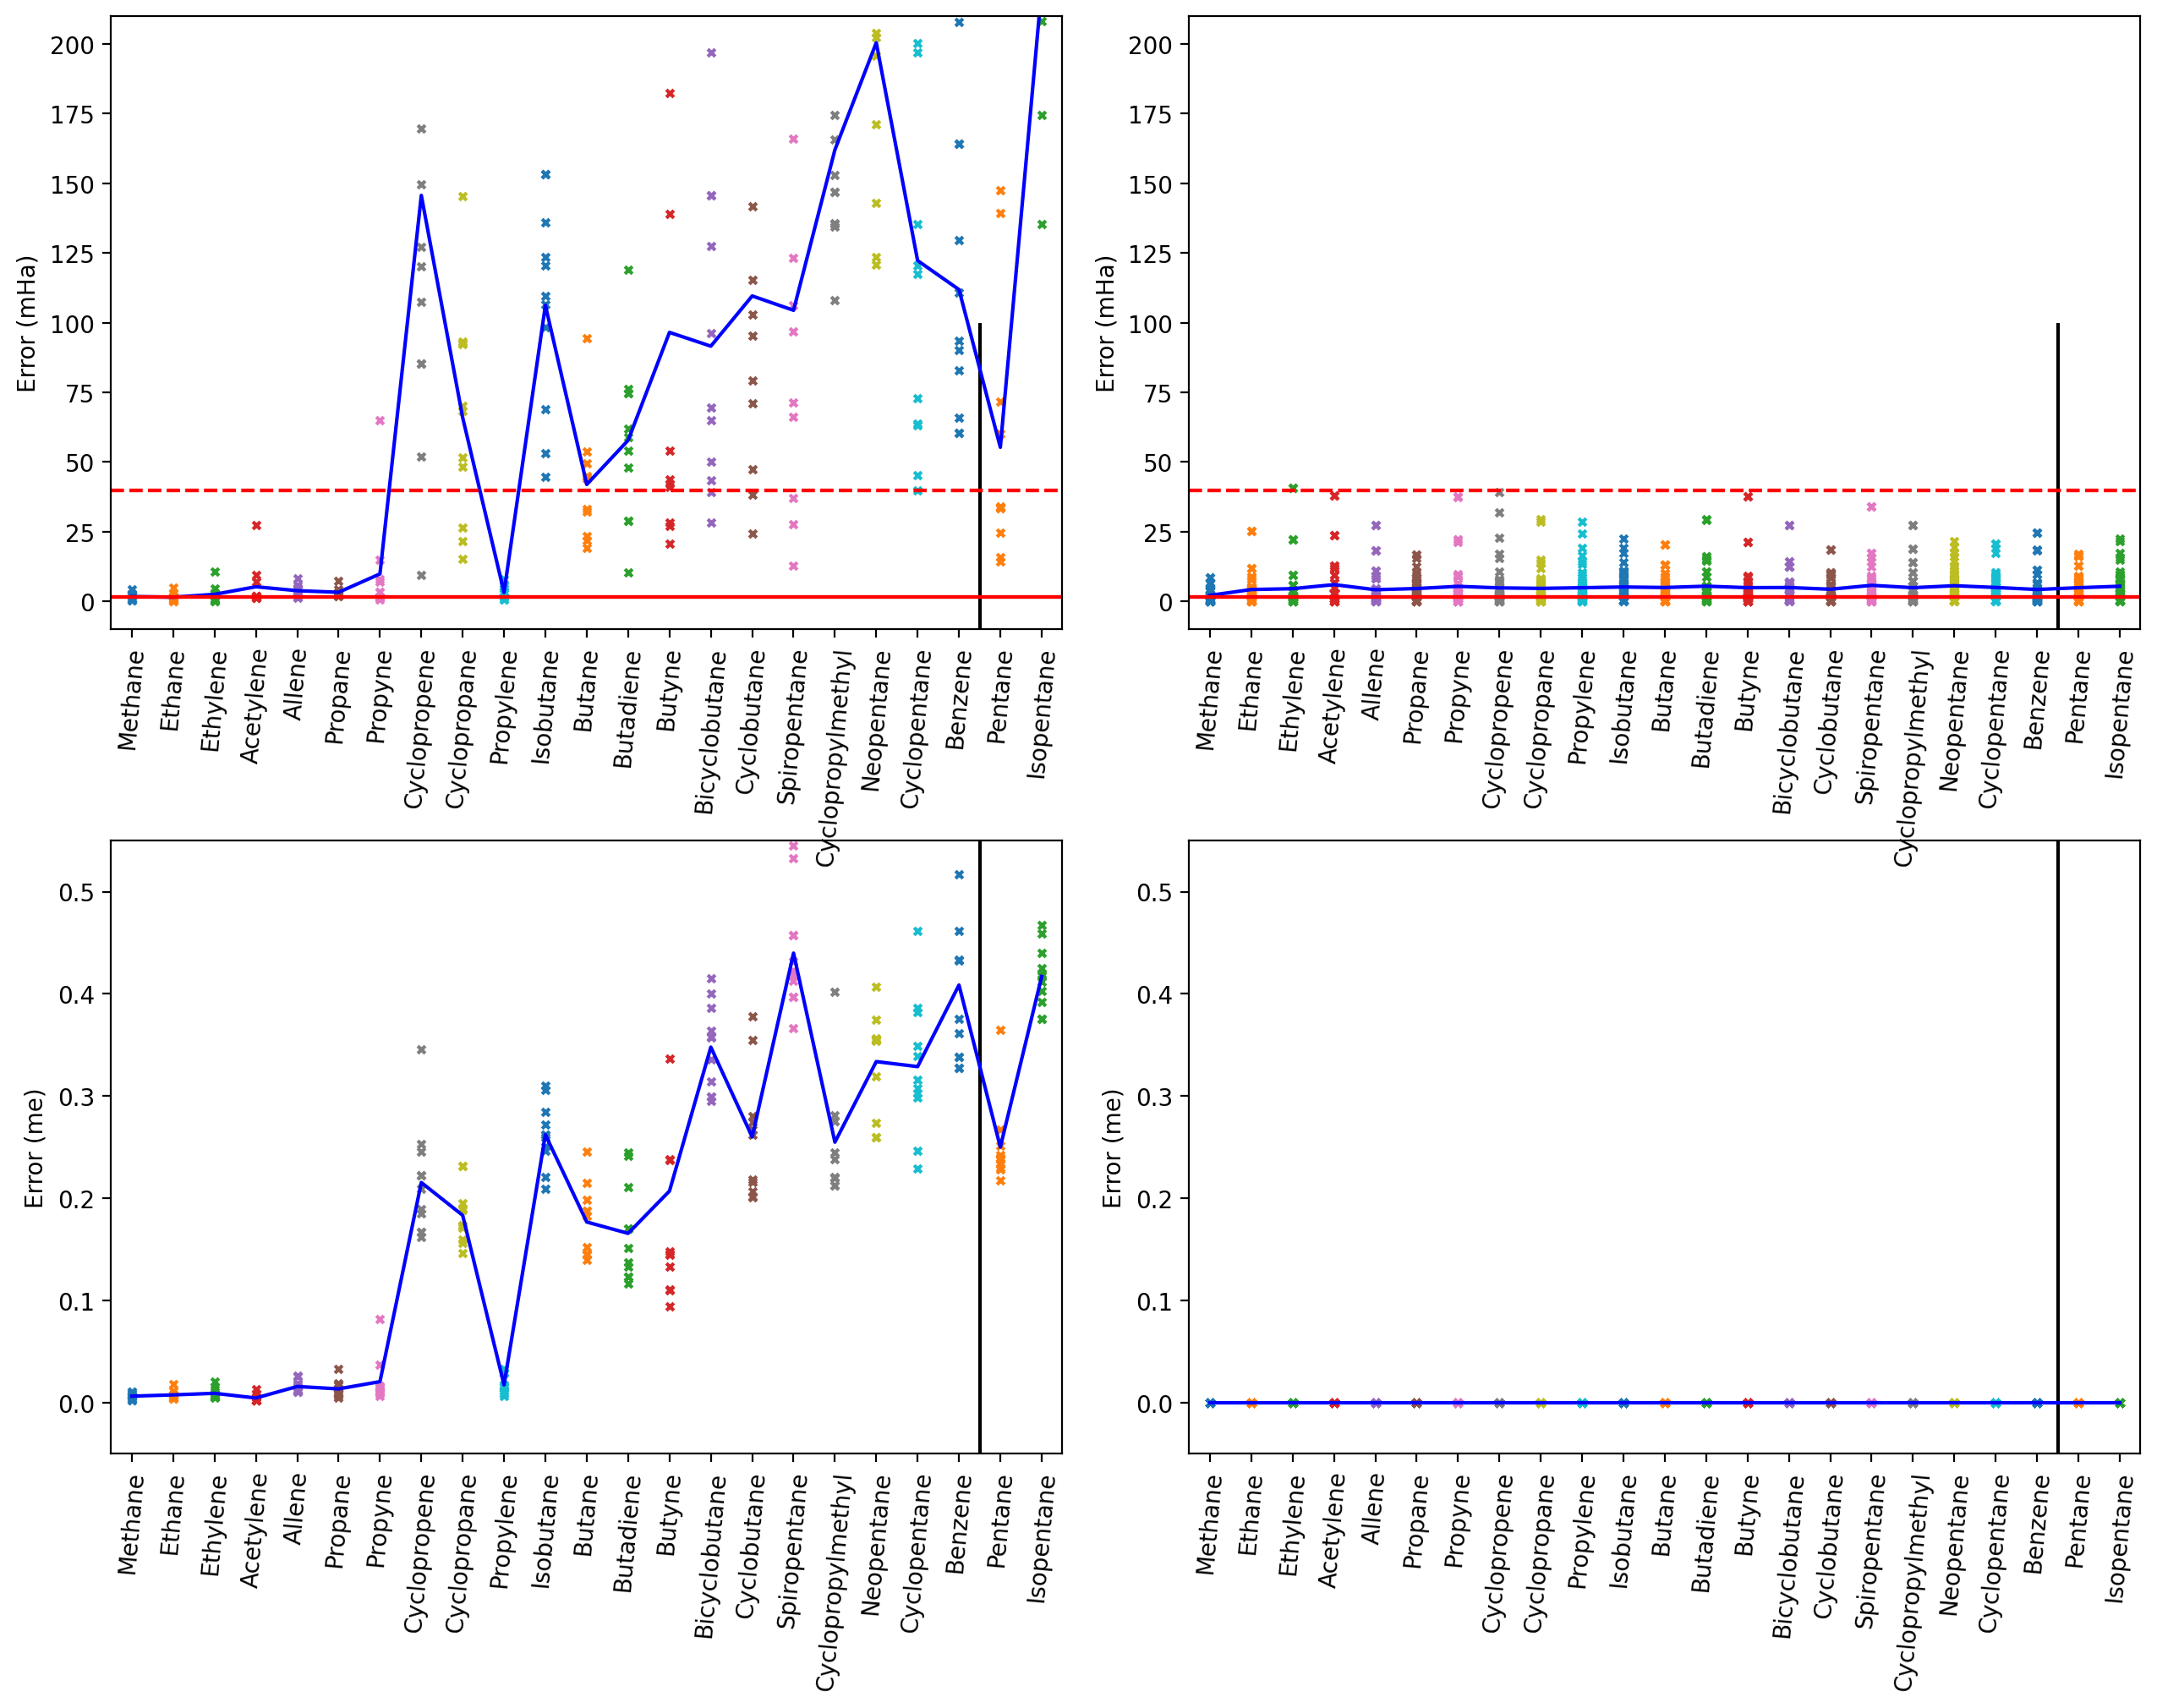

In [6]:
from pathlib import Path
import datetime

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

TRAIN_STR_DICT = [
    "Methane",
    "Ethane",
    "Ethylene",
    "Acetylene",
    "Allene",
    "Propane",
    "Propyne",
    "Cyclopropene",
    "Cyclopropane",
    "Propylene",
    "Isobutane",
    "Butane",
    "Butadiene",
    "Butyne",
    "Bicyclobutane",
    "Cyclobutane",
    "Spiropentane",
    "Cyclopropylmethyl",
    "Neopentane",
    "Cyclopentane",
    "Benzene",
]
EVAL_STR_DICT = [
    "Pentane",
    "Isopentane",
]

f, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.reshape(2, 2)

begin_y = 0.075
end_y = 0.925
int_y = 0.125
begin_x = 0.125
end_x = 0.925
int_x = 0.05
end_x += int_x
end_y += int_y

shapexy = np.shape(axes)
inter_x = np.linspace(begin_x, end_x, shapexy[1] + 1)
inter_y = np.linspace(begin_y, end_y, shapexy[0] + 1)

delta_x = inter_x[1] - inter_x[0] - int_x
delta_y = inter_y[1] - inter_y[0] - int_y

for i in range(shapexy[0]):
    for j in range(shapexy[1]):
        axes[i][j].set_position(
            [
                inter_x[j],
                inter_y[i],
                inter_x[j + 1] - inter_x[j] - int_x,
                inter_y[i + 1] - inter_y[i] - int_y,
            ]
        )

axes = axes[::-1, :]

# load_name = "2024-05-18-19-35-45-800"
# load_name = "2024-05-20-12-58-39-800"
# load_name = "2024-05-21-19-27-58-800"
# load_name = "2024-05-24-14-29-53-800"
# load_name = "2024-05-25-16-33-53-800"
# load_name = "2024-05-29-11-31-59-800"
load_name = "2024-05-28-19-58-45-800"

list_of_path = list(Path("validate/").glob(f"validate-ccdft-{load_name}"))
load_path = max(list_of_path, key=lambda p: p.stat().st_ctime)

list_of_path_dft = list(Path("validate/").glob("dft"))
load_path_dft = max(list_of_path_dft, key=lambda p: p.stat().st_ctime)

i_row_pd_l = {
    0: 0,
    1: 3,
}

distance = ""

for i_row in range(2):
    i_row_pd = i_row_pd_l[i_row]
    error_l = []

    lst = []
    data = pd.read_csv(load_path / "train.csv")
    data1 = pd.read_csv(load_path / "eval.csv")

    for i, i_name in enumerate(TRAIN_STR_DICT):
        data_np = data.filter(regex=(f"{i_name}.*{distance}")).to_numpy()[i_row_pd, :]
        if data_np.shape[0] == 0:
            data_np = data1.filter(regex=(f"{j_name}.*{distance}")).to_numpy()[
                i_row_pd, :
            ]
            
        data_np_sort = np.sort(np.abs(data_np))[1:]
        error_l.append(np.mean(data_np_sort))
        axes[i_row, 0].scatter(
            i + np.zeros_like(data_np_sort), data_np_sort, s=10, marker="x"
        )

    i += 1
    axes[i_row, 0].vlines(i - 0.5, -10, 100, "k")
    axes[0, 0].hlines(1 / 0.627, -0.5, 100 - 0.5, "r")
    axes[0, 0].hlines(25 / 0.627, -0.5, 100 - 0.5, "r", linestyle="--")

    for j, j_name in enumerate(EVAL_STR_DICT):
        data_np = data.filter(regex=(f"{j_name}.*{distance}")).to_numpy()[i_row_pd, :]
        if data_np.shape[0] == 0:
            data_np = data1.filter(regex=(f"{j_name}.*{distance}")).to_numpy()[
                i_row_pd, :
            ]

        data_np_sort = np.sort(np.abs(data_np))[1:]
        error_l.append(np.mean(data_np_sort))
        axes[i_row, 0].scatter(
            i + j + np.zeros_like(data_np_sort), data_np_sort, s=10, marker="x"
        )

    axes[i_row, 0].set_xticks(
        range(len(TRAIN_STR_DICT) + len(EVAL_STR_DICT)),
        TRAIN_STR_DICT + EVAL_STR_DICT,
        rotation=85,
    )

    axes[i_row, 0].plot(range(len(TRAIN_STR_DICT) + len(EVAL_STR_DICT)), error_l, "b")

    ## DFT
    error_l = []
    data = pd.read_csv(load_path_dft / "train_dft.csv")
    for i, i_name in enumerate(TRAIN_STR_DICT):
        if i_row == 0:
            data_eq = data.filter(regex=(f"{i_name}_0_1_0.0000")).to_numpy()[i_row]
        else:
            data_eq = 0
        data_np = (
            data.filter(regex=(f"{i_name}.*{distance}")).to_numpy()[i_row, :] - data_eq
        )
        data_np_sort = np.sort(np.abs(data_np))[1:]
        error_l.append(np.mean(data_np_sort))
        axes[i_row, 1].scatter(
            i + np.zeros_like(data_np_sort), data_np_sort, s=10, marker="x"
        )

    i += 1
    axes[i_row, 1].vlines(i - 0.5, -10, 100, "k")
    axes[0, 1].hlines(1 / 0.627, -0.5, 100 - 0.5, "r")
    axes[0, 1].hlines(25 / 0.627, -0.5, 100 - 0.5, "r", linestyle="--")

    data = pd.read_csv(load_path_dft / "eval_dft.csv")
    for j, j_name in enumerate(EVAL_STR_DICT):
        if i_row == 0:
            data_eq = data.filter(regex=(f"{j_name}_0_1_0.0000")).to_numpy()[i_row]
        else:
            data_eq = 0
        data_np = (
            data.filter(regex=(f"{j_name}.*{distance}")).to_numpy()[i_row, :] - data_eq
        )
        data_np_sort = np.sort(np.abs(data_np))[1:]
        error_l.append(np.mean(data_np_sort))
        axes[i_row, 1].scatter(
            i + j + np.zeros_like(data_np_sort), data_np_sort, s=10, marker="x"
        )

    axes[i_row, 1].set_xticks(
        range(len(TRAIN_STR_DICT) + len(EVAL_STR_DICT)),
        TRAIN_STR_DICT + EVAL_STR_DICT,
        rotation=85,
    )
    print(error_l)
    axes[i_row, 1].plot(range(len(TRAIN_STR_DICT) + len(EVAL_STR_DICT)), error_l, "b")
    axes[i_row, 0].set_xlim(-0.5, len(TRAIN_STR_DICT) + len(EVAL_STR_DICT) - 0.5)
    axes[i_row, 1].set_xlim(-0.5, len(TRAIN_STR_DICT) + len(EVAL_STR_DICT) - 0.5)

axes[0, 0].set_ylim(-10, 210)
axes[0, 0].set_ylabel("Error (mHa)")
axes[1, 0].set_ylim(-5e-2, 5.5e-1)
axes[1, 0].set_ylabel("Error (me)")
axes[0, 1].set_ylim(-10, 210)
axes[0, 1].set_ylabel("Error (mHa)")
axes[1, 1].set_ylim(-5e-2, 5.5e-1)
axes[1, 1].set_ylabel("Error (me)")
plt.savefig(
    f"./manu/figures/energy-ccdft-{load_name}.pdf",
    bbox_inches="tight",
)

In [15]:
data = pd.read_csv(load_path / "train.csv")
data1 = pd.read_csv(load_path / "eval.csv")
data = pd.concat([data, data1], ignore_index=True)

In [16]:
data

,Unnamed: 0,mean,Methane_0_1_-0.4900,Methane_0_1_-0.3500,Methane_0_1_-0.2100,Methane_0_1_-0.0700,Methane_0_1_0.0700,Methane_0_1_0.2100,Methane_0_1_0.3500,Methane_0_1_0.4900,...,Isopentane_1_2_0.3500,Isopentane_1_2_0.4900,Isopentane_1_3_-0.4900,Isopentane_1_3_-0.3500,Isopentane_1_3_-0.2100,Isopentane_1_3_-0.0700,Isopentane_1_3_0.0700,Isopentane_1_3_0.2100,Isopentane_1_3_0.3500,Isopentane_1_3_0.4900
0,0,4.043142,-0.787791,-1.382086,-2.364262,-3.422018,-2.176143,-0.071191,1.203020,0.864268,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1.064882,-27.720397,-26.676628,-24.614750,-25.266045,-26.927092,0.147910,0.414989,-0.414529,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,4.069027,-0.315088,-0.729947,-2.480874,-1.913195,0.993727,-0.219123,0.788006,1.278731,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,0.012196,0.005431,0.006536,0.003385,0.006212,0.005610,0.004111,0.007961,0.006296,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0.006313,0.006609,0.003890,-0.001089,-0.003454,0.003383,0.000499,0.004780,0.004664,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,0.003979,-0.000126,-0.000273,-0.000546,-0.007319,-0.004546,0.000488,0.000506,-0.002252,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,0.002698,0.000856,-0.003250,-0.000362,-0.000362,-0.000142,-0.000196,-0.000893,-0.001066,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0,57.383784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-24.946621,-47.342089,-8.830200,44.649914,73.867788,87.501889,89.145147,35.100693,-20.149386,-37.996003
8,1,11.413246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.067643,-2.277350,34.849704,25.883387,18.922999,14.176474,18.215429,11.273193,6.983702,14.330730
9,2,55.079504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-32.014402,-45.064816,-43.679971,18.766435,54.944736,73.325387,70.929689,23.827448,-27.133185,-52.326856
